<a href="https://colab.research.google.com/github/fanissazzahra/Tugas_Kelompok_Statistik/blob/main/Tugas_Statistik_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kelompok 2 Orang
print("1. Rosalia Dina Marina S (G1A021017)");
print("2. Fanissa Azzahra (G1A021091)");

1. Rosalia Dina Marina S (G1A021017)
2. Fanissa Azzahra (G1A021091)


In [9]:
import pandas as pan
import numpy as num
import statistics
dataset = pan.read_csv("https://raw.githubusercontent.com/fanissazzahra/Tugas-Statistika-Terapan-/main/unemployment%20analysis.csv")
# % of unemployment rate in year 2000-2005
dataset.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005
0,Africa Eastern and Southern,AFE,7.72,7.73,7.96,7.79,7.31,7.12
1,s,AZE,11.78,10.91,10.04,9.17,7.99,7.26
2,Burundi,BDI,1.59,1.59,1.59,1.61,1.60,1.62
3,Botswana,BWA,15.88,18.54,21.13,23.80,21.83,19.81
4,Central African Republic,CAF,5.61,5.69,5.80,5.81,5.72,5.70


In [3]:
dataset.shape

(28, 8)

In [4]:
print(dataset.isnull().sum())

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
dtype: int64


In [5]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
dtype: int64


In [11]:
dataset["2003"] = dataset["2003"].replace(num.NaN, dataset["2003"].mean())
print(dataset["2003"][:10])

0     7.79
1     9.17
2     1.61
3    23.80
4     5.81
5     7.57
6     2.33
7     4.14
8     7.54
9     9.78
Name: 2003, dtype: float64


In [12]:
dataset["Country Name"] = dataset["Country Name"].interpolate(method='linear', limit_direction='forward', axis=0)
dataset.isnull().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
dtype: int64

In [13]:
dataset["2003"][:10]

0     7.79
1     9.17
2     1.61
3    23.80
4     5.81
5     7.57
6     2.33
7     4.14
8     7.54
9     9.78
Name: 2003, dtype: float64

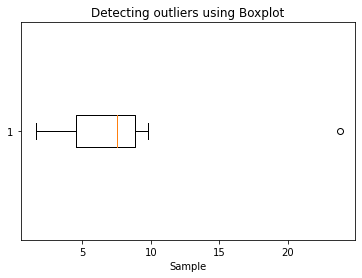

In [14]:
import matplotlib.pyplot as plt

sample= [7.79, 9.17, 1.61, 23.80, 5.81, 7.57, 2.33, 4.14, 7.54, 9.78]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [15]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    two = 2
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > two):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [23.8]


In [16]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [23.8]


In [17]:
# Trimming
for i in sample_outliers:
    a = sample
    a.remove(i)
print(a)
# print(len(sample), len(a))

[7.79, 9.17, 1.61, 5.81, 7.57, 2.33, 4.14, 7.54, 9.78]


In [18]:
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [7.79, 9.17, 1.61, 5.81, 7.57, 2.33, 4.14, 7.54, 9.78]
New array:  [7.79 9.17 1.61 5.81 7.57 2.33 4.14 7.54 9.78]


Text(0.5, 0, 'Sample')

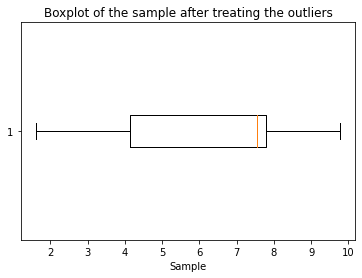

In [19]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [20]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

2.186 9.292
New array: [7.79  9.17  2.186 5.81  7.57  2.33  4.14  7.54  9.292]


In [21]:
# HeatMap
print("1. Rosalia Dina Marina S (G1A021017)");
print("2. Fanissa Azzahra (G1A021091)");

1. Rosalia Dina Marina S (G1A021017)
2. Fanissa Azzahra (G1A021091)


In [22]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pandas as pd

In [24]:
!dir

sample_data


In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/fanissazzahra/Tugas-Statistika-Terapan-/main/unemployment%20analysis.csv")

In [27]:
np.corrcoef(df['2001'], df['2003'])

array([[1.        , 0.97919896],
       [0.97919896, 1.        ]])

In [26]:
df.corr()

,2000,2001,2002,2003,2004,2005
2000,1.000000,0.991095,0.973537,0.948495,0.913506,0.895524
2001,0.991095,1.000000,0.994474,0.979199,0.951895,0.934853
2002,0.973537,0.994474,1.000000,0.993247,0.970851,0.953411
2003,0.948495,0.979199,0.993247,1.000000,0.986720,0.970962
2004,0.913506,0.951895,0.970851,0.986720,1.000000,0.996027
2005,0.895524,0.934853,0.953411,0.970962,0.996027,1.000000


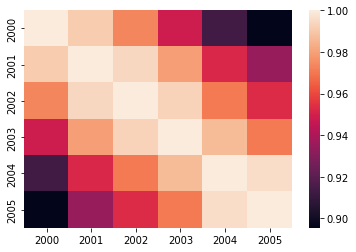

In [28]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()